In [15]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
base = pd.read_csv('../Data/BaseData.csv')
base.shape

(2580, 299)

In [17]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [19]:
no_bootstrap_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', bootstrap=False)
no_bootstrap_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False)

In [25]:
bootstrap_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', bootstrap=True)
bootstrap_model.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
print("R^2 on Train without bootstrapping:", no_bootstrap_model.score(X_train, y_train))
print("R^2 on Train with bootstrapping:", bootstrap_model.score(X_train, y_train))

R^2 on Train without bootstrapping: 1.0
R^2 on Train with bootstrapping: 0.982571076307004


In [14]:
print("R^2 on Test without bootstrapping:", no_bootstrap_model.score(X_test, y_test))
print("R^2 on Test with bootstrapping:", bootstrap_model.score(X_test, y_test))

R^2 on Test without bootstrapping: 0.8269997379260945
R^2 on Test with bootstrapping: 0.8893801544840669


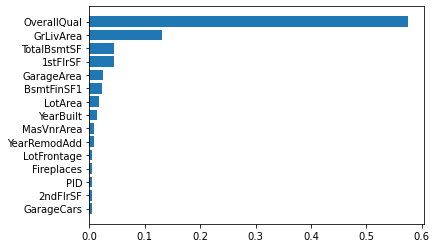

In [10]:
X_cols = base.drop(['SalePrice'], axis=1).columns
from matplotlib import pyplot as plt
sorted_idx = bootstrap_model.feature_importances_.argsort()[283:300]
plt.barh(X_cols[sorted_idx], bootstrap_model.feature_importances_[sorted_idx]);

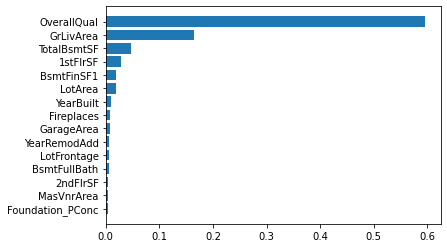

In [11]:
X_cols = base.drop(['SalePrice'], axis=1).columns
from matplotlib import pyplot as plt
sorted_idx = no_bootstrap_model.feature_importances_.argsort()[283:300]
plt.barh(X_cols[sorted_idx], no_bootstrap_model.feature_importances_[sorted_idx]);

In [12]:
predicted_value = bootstrap_model.predict(X_test)

In [13]:
true_value = y_test

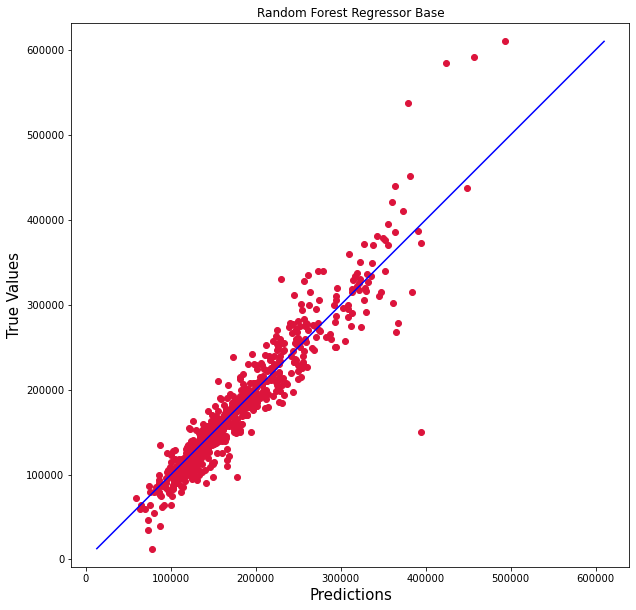

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Random Forest Regressor Base')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()
